## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np #this module is how to generate plots without pandas
import scipy.stats as st #this module will be used to help calculate linear regression values at the end  

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data=pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"]) #using a outer join on the mouse id column 
# Display the data table for preview
all_data.head() #.head is a method that displays your dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice=all_data["Mouse ID"].value_counts() #value.counts gives us the number of non-null values for [column] specified
number_of_mice=len(mice) #global len method available 
number_of_mice #test

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=all_data.loc[all_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique() #.unique 
duplicate_mice #test; shows us g989 is the duplicate mouse id 

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice_id=pd.DataFrame(duplicate_mice)
all_duplicate_mice_id #test

,0
0,g989


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=all_data[all_data["Mouse ID"].isin(duplicate_mice)==False] #isin will return a dataframe of booleans showing whether each element in the DataFrame is contained in values.
clean_df #test

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice #test; number of mice drops from 249 to 248, therefore duplicate mouse has been successfully removed

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# I will create a table for each method instead of doing the .describe method so I can piece each value together when needed

regimen_mean=clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"] #.mean function
regimen_mean #test


regimen_median=clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"] #.median function
regimen_median #test


regimen_variance=clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"] #.var function 
regimen_variance #test


regimen_std=clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"] #.std= standard deviation function 
regimen_std #test

regimen_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"] #SEM= standard error of the mean function  
regimen_sem #test

#Now to put all the values together into one dataframe using the pd.Dataframe method:
summary_statistics = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_statistics #test if the lines above have been achieved

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
single_group_by=clean_df.groupby("Drug Regimen")
second_summary_statistics=single_group_by.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"] #using the .agg method as asked
second_summary_statistics #test

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

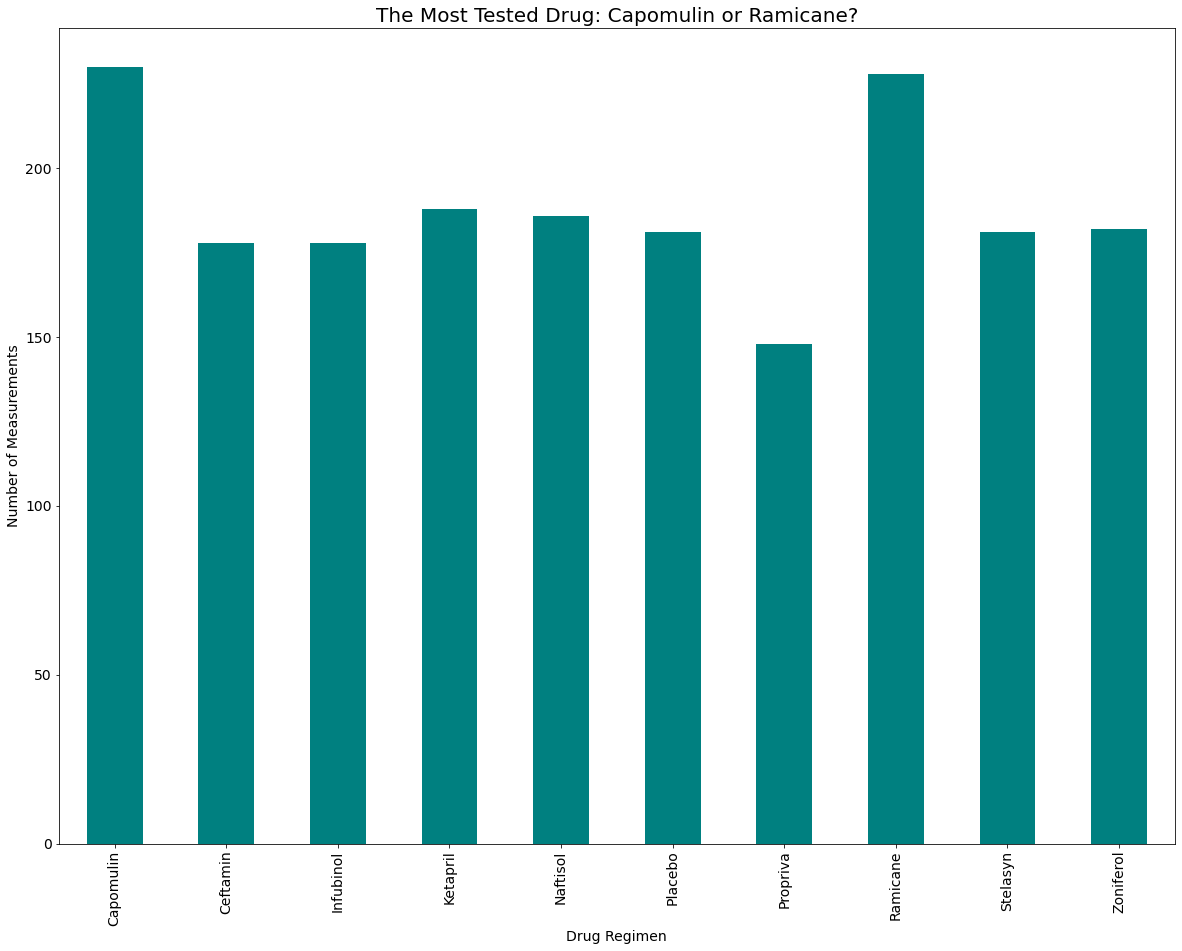

In [72]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas:
number_of_measurements=clean_df.groupby(["Drug Regimen"]).count()["Timepoint"] #or should i be using all_data instead of clea


plot=number_of_measurements.plot.bar(figsize=(20,15), color="teal",fontsize=14) #figsize, color and fontsize are all customizable
number_of_measurements #test

# Setting standard chart elements below: 
plt.xlabel("Drug Regimen",fontsize=14) #this creates a label for the x-axis
plt.ylabel("Number of Measurements",fontsize=14) #this creates a label for the y-axis
plt.title("The Most Tested Drug: Capomulin or Ramicane?",fontsize=20) #this creates a title for the chart; try not to make it boring, but rather descriptive 

plt.savefig("Images/Bar_Chart_Pandas.png", bbox_inches="tight") #savefig will save it as a .png with the specified title and in the specified folder of images
#plt.tight_layout()
#plt.show()


(0.0, 255.0)

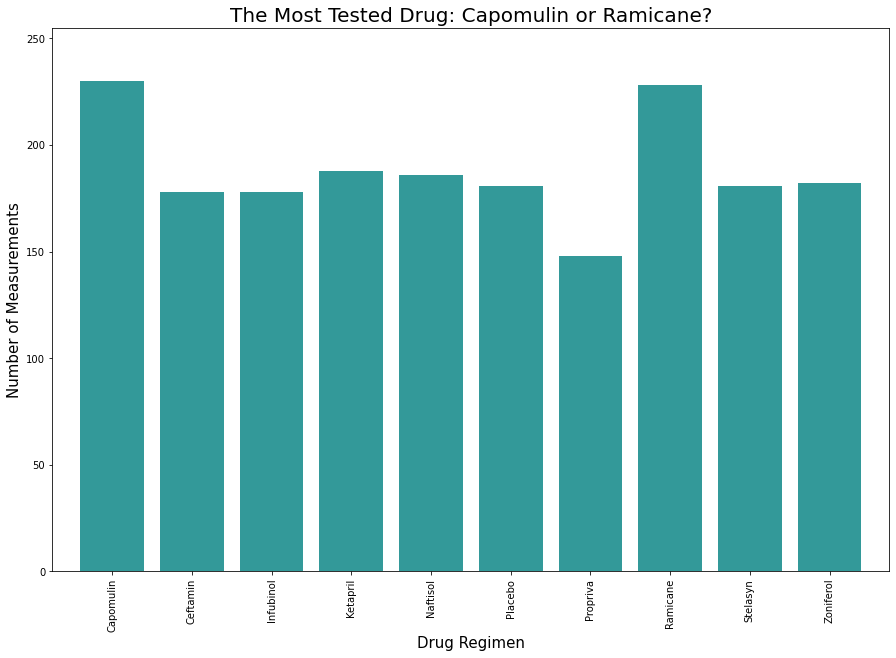

In [70]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# First, create an array that contains the total number of measurements for each specific drug regimen
mice_list=(clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist() #.tolist converts series to a list(aka array)
mice_list #test

x_axis=np.arange(len(number_of_measurements)) #manually setting our x-axis using the arrange method available to numpy
fig1, ax1=plt.subplots(figsize=(15, 10)) #plt.subplots Create a figure and a set of subplots. This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.
plt.bar(x_axis, mice_list, color="teal", alpha=0.8, align="center") #plt.bar will generate a bar plot

tick_locations=[value for value in x_axis] #using sophisticated list comprehension as opposed to a for loop; both accomplish the same goal

plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical") #setting the name of each bar by passing a hard-coded list of names 

# Setting standard chart elements below:
plt.title("The Most Tested Drug: Capomulin or Ramicane?",fontsize=20) #generating the title of the bar chart
plt.xlabel("Drug Regimen",fontsize = 15) #generating the title of the x-axis
plt.ylabel("Number of Measurements",fontsize = 15) #generating the title of the y-axis
plt.xlim(-0.75, len(x_axis)-0.25) #setting where you want you x-axis to start and end 
plt.ylim(0, max(mice_list)+25) #setting where you want you y-axis to start and end

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Use Groupby method available to pandas to create the dataframe first
groupby_gender=clean_df.groupby(["Mouse ID","Sex"])
groupby_gender #test if grouping was successful
gender_df=pd.DataFrame(groupby_gender.size()) #generate a dataframe using pd.Dataframe method 

# Create the dataframe with total count of Female and Male mice
mouse_gender=pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns=["Total Count"]

# Create and format the percentage of female vs male
mouse_gender["Percentage of Sex"]=(100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# Format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"]=mouse_gender["Percentage of Sex"]

gender_df #test

,,0
Mouse ID,Sex,
a203,Female,10
a251,Female,10
a262,Female,10
a275,Female,10
a366,Female,7
...,...,...
z435,Female,3
z578,Male,10
z581,Female,10


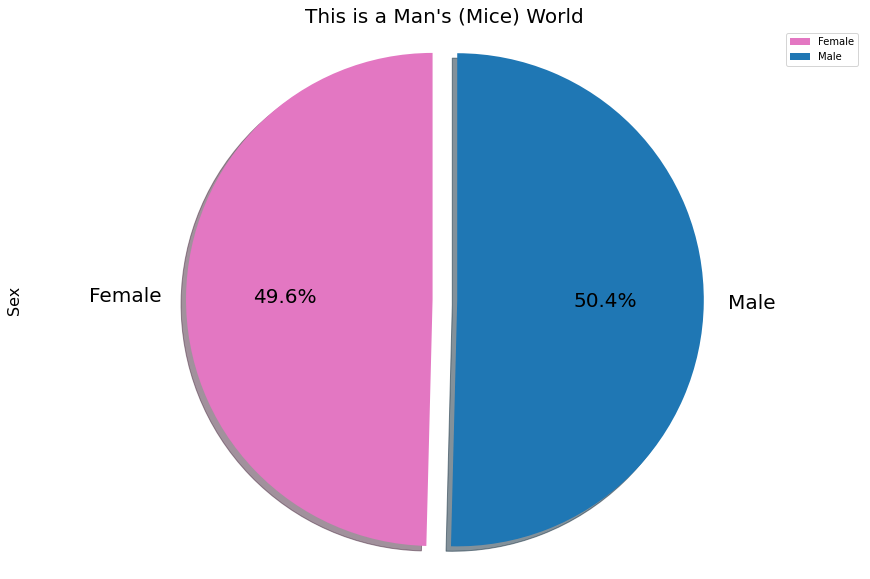

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors=["tab:pink", "tab:blue"] #https://matplotlib.org/3.1.0/gallery/color/named_colors.html for a list of colors available
explode=(0.1, 0) #explode means would you like to offset a slice, if explode is 0,0 then pie chart will be one piece with no segmentation 
plot=mouse_gender.plot.pie(y="Total Count",figsize=(15,10), colors= colors, startangle=90, explode=explode, shadow=True, autopct="%1.1f%%", fontsize=20)

# Setting standard chart elements below:
plt.title("This is a Man's (Mice) World",fontsize=20)
plt.ylabel("Sex",fontsize=16) 
plt.axis("equal") #will ensure that equal axis ratios are created as to not have a distorted image

plt.savefig("Images/Pie_Chart_Gender.png", bbox_inches="tight") #this will save the figure to the images folder
plt.show() #display your plot 

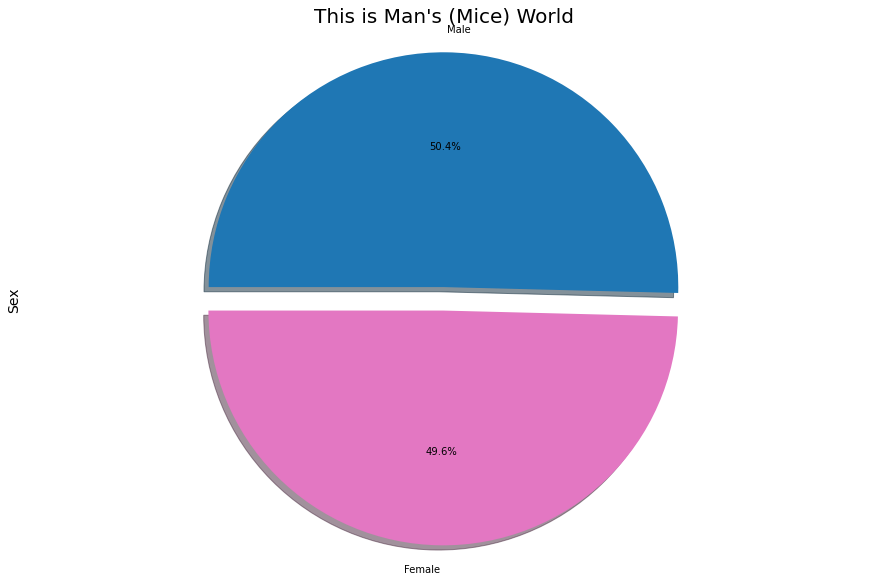

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels=["Female","Male"] 

# List the values of each section of the pie chart
sizes=[49.6,50.4] #manually set these in pyplot

#Set colors for each section of the pie
colors=["tab:pink", "tab:blue"]

#Determine which section of the circle to detach
explode=(0.1, 0)

#Create the pie chart based upon the values 
fig1, ax1=plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("This is Man's (Mice) World",fontsize = 20)
plt.ylabel("Sex",fontsize = 14)
plt.axis("equal") #will ensure that equal axis ratios are created as to not have a distorted image

#plt.savefig("../Images/pi_plot.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_df=clean_df.loc[all_data["Drug Regimen"]=="Capomulin",:]
Ramicane_df=clean_df.loc[all_data["Drug Regimen"]=="Ramicane", :]
Infubinol_df=clean_df.loc[all_data["Drug Regimen"]=="Infubinol", :]
Ceftamin_df=clean_df.loc[all_data["Drug Regimen"]=="Ceftamin", :]

# Capomulin
Capomulin_last=Capomulin_df.groupby("Mouse ID").max()["Timepoint"] #use the max method to find highest tumor volume
Capomulin_vol=pd.DataFrame(Capomulin_last)
Capomulin_merge=pd.merge(Capomulin_vol, all_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [17]:
# Put treatments into a list for a for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds

Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles=Capomulin_tumors.quantile([.25,.5,.75]) #.quantile method
lowerq=quartiles[0.25] #lower quartile will be bottom .25 (these are standard numbers for quartile ranges)
upperq=quartiles[0.75] #upper quartile is top .25
iqr=upperq-lowerq #interquartile range always= upper quartile- lower quartile


print(f"The lower quartile of Capomulin tumors: {lowerq}") #recall f string method which allows us to combine string values with other value types in {}
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound=lowerq-(1.5*iqr) #once again, these are standard formulas in statistics for calculating the lower bound and upper bound 
upper_bound=upperq+(1.5*iqr)

print(f"Values below {lower_bound} could be outliers.") #these are values that fall below lower "whisker" of box and whisker plot
print(f"Values above {upper_bound} could be outliers.") #these are values that fall above higher "whisker" of box and whisker plot

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [18]:
# Ramicane; repeat the process for each drug regimen to get summary statistics 

Ramicane_last=Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_vol=pd.DataFrame(Ramicane_last)
Ramicane_merge=pd.merge(Ramicane_vol, all_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds

Ramicane_tumors=Ramicane_merge["Tumor Volume (mm3)"]

quartiles=Ramicane_tumors.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [19]:
# Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last=Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol=pd.DataFrame(Infubinol_last)
Infubinol_merge=pd.merge(Infubinol_vol, all_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head() #test

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [20]:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
Infubinol_tumors=Infubinol_merge["Tumor Volume (mm3)"]

quartiles=Infubinol_tumors.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, all_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head() #test

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [22]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles=Ceftamin_tumors.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


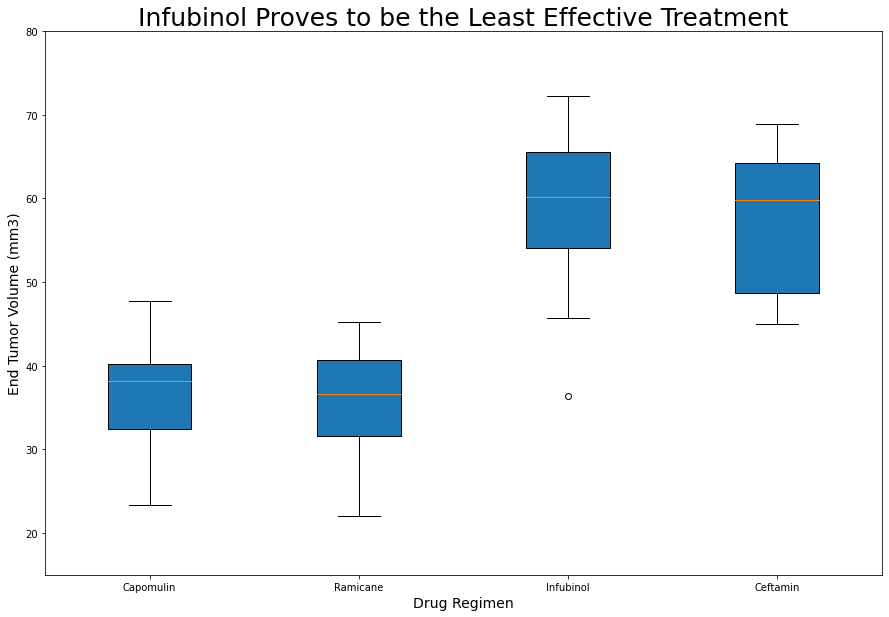

In [63]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot=[Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Setting standard chart elements below: 
fig1, ax1=plt.subplots(figsize=(15, 10))
ax1.set_title("Infubinol Proves to be the Least Effective Treatment",fontsize =25)
ax1.set_ylabel("End Tumor Volume (mm3)",fontsize = 14)
ax1.set_xlabel("Drug Regimen",fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True) #boxplot will generate a box and whisker plot; patch_artist will fill the box if true, vert will make the plots vertical if true 

plt.ylim(15, 80) #manually setting where I would like to the y value to start and stop 

plt.savefig("Images/Box_Plot.png", bbox_inches="tight")

plt.show() #display your plot using .show() method

## Line and Scatter Plots

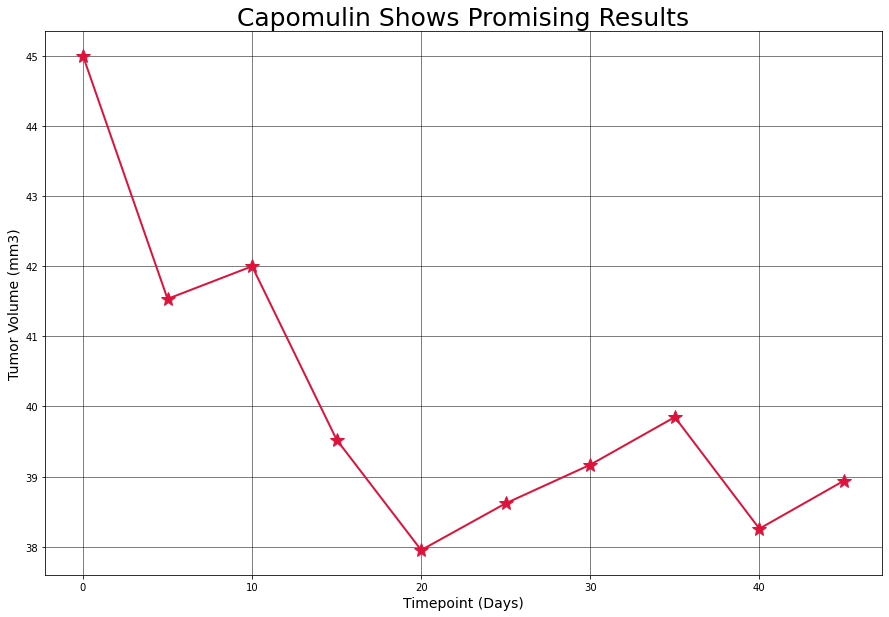

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplot_df=Capomulin_df.loc[Capomulin_df["Mouse ID"]=="b742",:] #we know mouse b742 was treated with Capomulin
lineplot_df.head() #test

x_axis=lineplot_df["Timepoint"]
tumorsize=lineplot_df["Tumor Volume (mm3)"]

fig1, ax1=plt.subplots(figsize=(15, 10)) #create the plot
# Setting standard chart elements below:
plt.title("Capomulin Shows Promising Results",fontsize =25)
plt.plot(x_axis, tumorsize, linewidth=2, markersize=15, marker="*", color="crimson")
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)
ax1.grid() #this will enable gridlines to appear on the scatterplot
ax1.grid(linestyle='-', linewidth="0.5", color="black") #customize the gridlines

plt.savefig("Images/Line_Chart.png", bbox_inches = "tight")
plt.show() #display your plot 

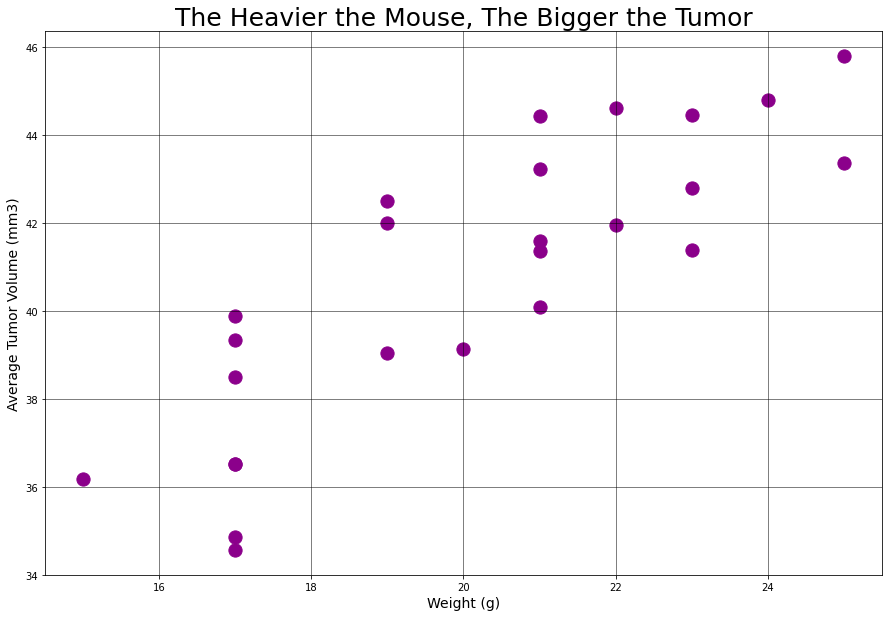

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1=plt.subplots(figsize=(15, 10))
avg_capomulin_vol=Capomulin_df.groupby(["Mouse ID"]).mean()

marker_size=15
plt.scatter(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"], s=175, color="darkmagenta") #plt.scatter
ax1.grid() #this will enable gridlines to appear on the scatterplot
ax1.grid(linestyle="-", linewidth="0.5", color="black") #customize the gridlines
# Setting other standard chart elements below:
plt.title("The Heavier the Mouse, The Bigger the Tumor",fontsize =25)
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)",fontsize=14)


plt.savefig("Images/Scatterplot.png", bbox_inches="tight")
plt.show() #display your plot 

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"])[0],2) #pearsonr gives us the r-value
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [58]:
#Calculate the correlation coefficient and linear regression model 
x_values=avg_capomulin_vol["Weight (g)"]
y_values=avg_capomulin_vol["Tumor Volume (mm3)"]

slope, intercept, r_value, p_value, std_err=st.linregress(x_values, y_values)
regression_values = x_values*slope+intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{r_value}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{std_err}")

line_equation="y="+str(round(slope,2))+"x+"+str(round(intercept,2)) #y=mx+b


slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134


The r-squared value is: 0.7088568047708717


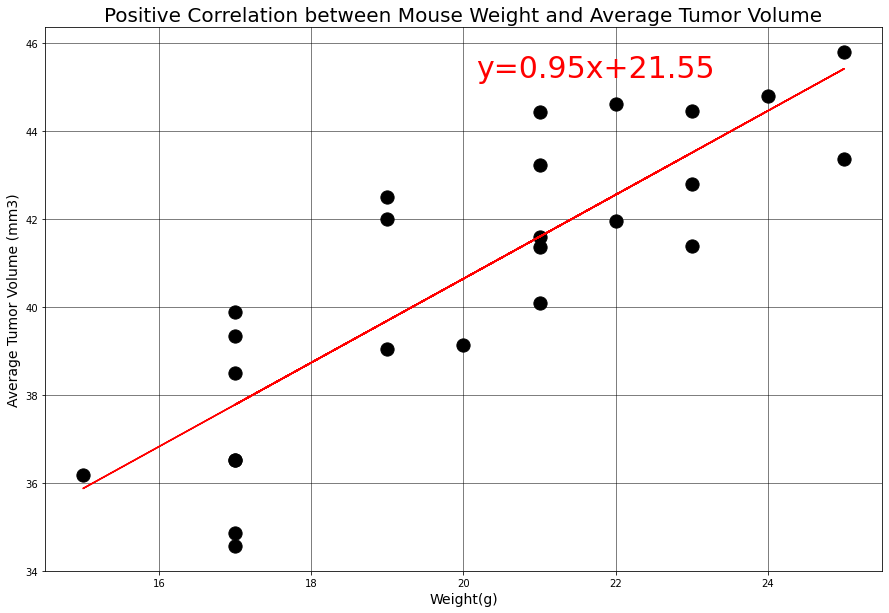

In [56]:
# Add the linear regression equation and line to the plot; this was not required but I find it helpful to show
fig1, ax1=plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="k")
plt.plot(x_values,regression_values,"r-")
plt.title("Positive Correlation between Mouse Weight and Average Tumor Volume",fontsize =20)
plt.xlabel("Weight(g)",fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)",fontsize=14)
ax1.grid() #this will enable gridlines to appear on the scatterplot
ax1.grid(linestyle='-', linewidth="0.5", color="black") #customize the gridlines
ax1.annotate(line_equation, xy=(20, 40), xycoords="data",xytext=(0.8, 0.95), textcoords="axes fraction",horizontalalignment="right", verticalalignment="top",fontsize=30,color="red")

print(f"The r-squared value is: {r_value**2}") #**= ^

plt.savefig("Images/Linear_Regression.png", bbox_inches="tight")
plt.show() #display your plot 